In [712]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [713]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [714]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [715]:
train.shape

(891, 12)

In [716]:
test.shape

(418, 11)

In [717]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [718]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [719]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [720]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [721]:
sns.set()

In [722]:
def bar_chart(feature):
    survived = train[train["Survived"]==1][feature].value_counts()
    dead = train[train["Survived"]==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked = True, figsize =(5,3))

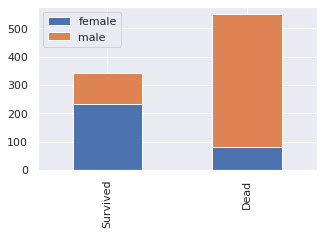

In [723]:
bar_chart("Sex")

In [724]:
# we can see that a high number of males died compared to females

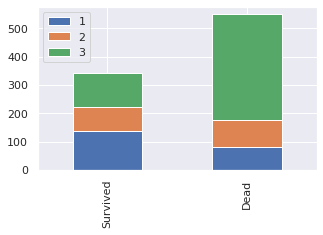

In [725]:
bar_chart("Pclass")

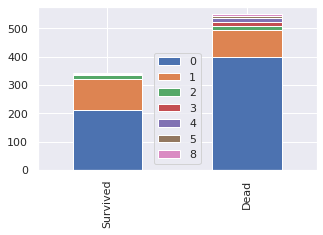

In [726]:
bar_chart("SibSp")

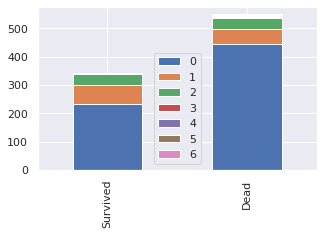

In [727]:
bar_chart("Parch")

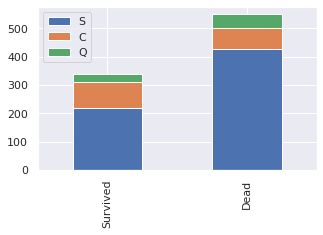

In [728]:
bar_chart("Embarked")

In [729]:
#FEATURE ENGINEERING
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [730]:
train_test_data = [train, test]

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-za-z]+)\.' , expand = False)

In [731]:
train["Title"].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Countess      1
Jonkheer      1
Sir           1
Ms            1
Capt          1
Mme           1
Don           1
Lady          1
Name: Title, dtype: int64

In [732]:
test["Title"].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dr          1
Dona        1
Ms          1
Name: Title, dtype: int64

In [733]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2,
                 "Master": 0, "Dr": 3, "Rev": 3, "Major": 3, "Mlle": 3, "Col": 3, "Countess": 3,
                 "Jhonkeer": 3, "Sir": 3, "Ms": 3, "Capt": 3, "Mme": 3, "Don": 3, "Lady": 3, "Dona": 3 }
for dataset in train_test_data:
    dataset["Title"] = dataset["Title"].map(title_mapping)

In [734]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0


In [735]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Title          890 non-null float64
dtypes: float64(3), int64(5), object(5)
memory usage: 90.6+ KB


In [736]:
train["Title"] = train['Title'].fillna(0)

In [737]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


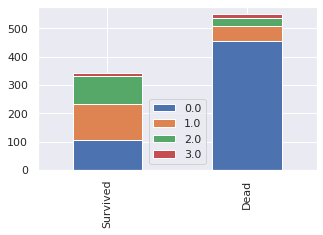

In [738]:
bar_chart("Title")

In [739]:
train.drop('Name', axis=1,inplace=True)
test.drop('Name',axis=1,inplace=True)

In [740]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0.0


In [741]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,2


In [742]:
sex_mapping = {"male": 0,"female":1}

for dataset in train_test_data:
    dataset["Sex"] = dataset["Sex"].map(sex_mapping)

In [743]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0.0


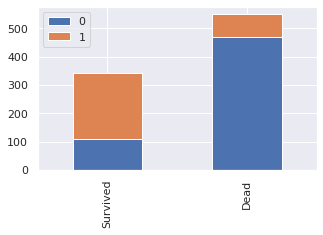

In [744]:
bar_chart("Sex")

In [745]:
train["Title"] = train.Title.astype(int)

In [746]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


In [747]:
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace =True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace =True)

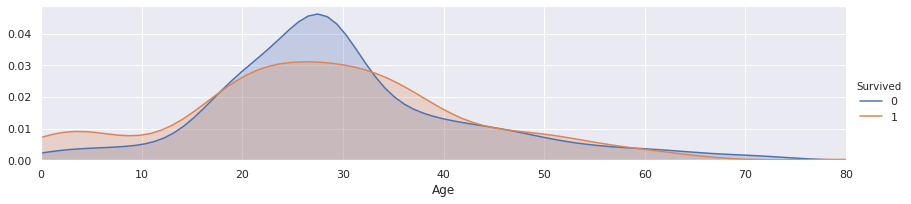

In [748]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,"Age",shade=True)
facet.set(xlim=(0, train["Age"].max()))
facet.add_legend()

plt.show()

In [749]:
for dataset in train_test_data:
    dataset.loc[dataset['Age'] <= 20, "Age"] = 0,
    dataset.loc[(dataset["Age"] > 20) & (dataset["Age"] <= 45), "Age"] = 1,
    dataset.loc[(dataset["Age"] > 45) & (dataset["Age"] <= 62), "Age"] = 2,
    dataset.loc[(dataset["Age"] > 62), "Age"] = 3

In [752]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,1.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,1.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,1.0,0,0,373450,8.0500,NaN,S,0


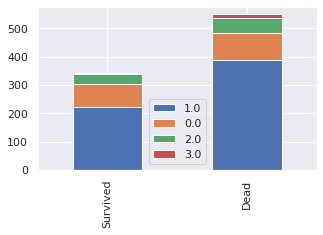

In [753]:
bar_chart("Age")

In [754]:
Pclass1 = train[train["Pclass"]==1]["Embarked"].value_counts()
Pclass2 = train[train["Pclass"]==2]["Embarked"].value_counts()
Pclass3 = train[train["Pclass"]==3]["Embarked"].value_counts()
df = pd.DataFrame([Pclass1,Pclass2,Pclass3])
df.head()

,S,C,Q
Embarked,127,85,2
Embarked,164,17,3
Embarked,353,66,72


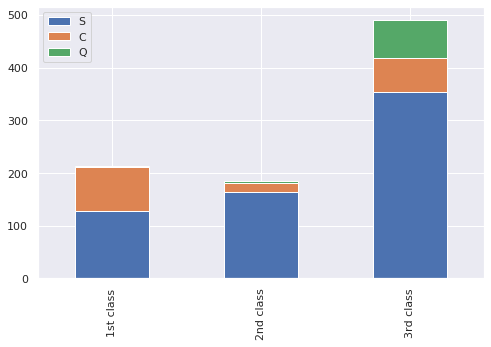

In [755]:
df.index = ['1st class','2nd class','3rd class']
df.plot(kind="bar",stacked= True, figsize=(8,5))

In [756]:
embarked_mapping = {"S": 0,"C": 1,"Q":2}

for dataset in train_test_data:
    dataset["Embarked"] = dataset["Embarked"].map(embarked_mapping)

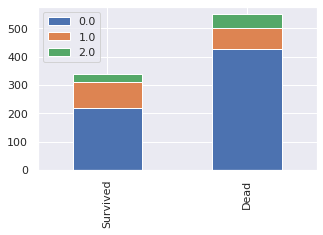

In [757]:
bar_chart("Embarked")

In [758]:
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"),inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"),inplace=True)

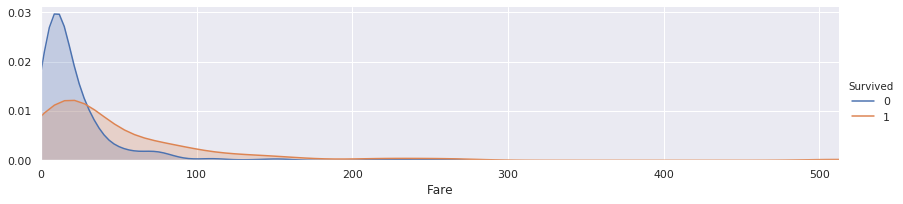

In [759]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,"Fare",shade=True)
facet.set(xlim=(0, train["Fare"].max()))
facet.add_legend()

plt.show()

In [760]:
for dataset in train_test_data:
    dataset.loc[dataset['Fare'] <= 20, "Fare"] = 0,
    dataset.loc[(dataset["Fare"] > 20) & (dataset["Fare"] <= 50), "Fare"] = 1,
    dataset.loc[(dataset["Fare"] > 50) & (dataset["Fare"] <= 95), "Fare"] = 2,
    dataset.loc[(dataset["Fare"] > 95), "Fare"] = 3
    

In [761]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0.0,0
1,2,1,1,1,1.0,1,0,PC 17599,2.0,C85,1.0,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0.0,1
3,4,1,1,1,1.0,1,0,113803,2.0,C123,0.0,2
4,5,0,3,0,1.0,0,0,373450,0.0,NaN,0.0,0


In [762]:
train.Cabin.value_counts()

C23 C25 C27    4
B96 B98        4
G6             4
E101           3
C22 C26        3
              ..
A5             1
D50            1
C103           1
D9             1
A19            1
Name: Cabin, Length: 147, dtype: int64

In [763]:
for dataset in train_test_data:
    dataset["Cabin"]= dataset["Cabin"].str[:1]

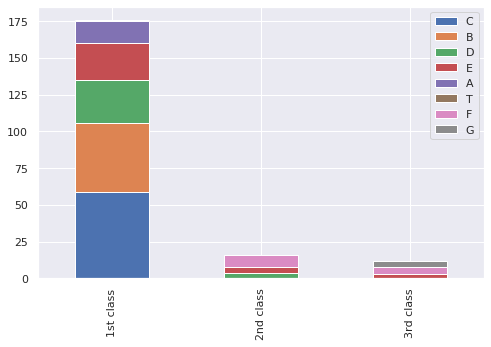

In [764]:
Pclass1 = train[train["Pclass"]==1]["Cabin"].value_counts()
Pclass2 = train[train["Pclass"]==2]["Cabin"].value_counts()
Pclass3 = train[train["Pclass"]==3]["Cabin"].value_counts()
df = pd.DataFrame([Pclass1,Pclass2,Pclass3])
df.index = ['1st class','2nd class','3rd class']
df.plot(kind="bar",stacked= True, figsize=(8,5))

In [765]:
cabin_mapping = {"A":0 , "B":0.4,"C":0.8,"D":1.2, "E" : 1.6,"F":2.0, "G":2.4,"T":2.8}

for dataset in train_test_data:
    dataset["Cabin"] = dataset["Cabin"].map(cabin_mapping)

In [766]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0.0,0
1,2,1,1,1,1.0,1,0,PC 17599,2.0,0.8,1.0,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0.0,1
3,4,1,1,1,1.0,1,0,113803,2.0,0.8,0.0,2
4,5,0,3,0,1.0,0,0,373450,0.0,NaN,0.0,0


In [767]:
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"),inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"),inplace=True)

In [768]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0.0,0
1,2,1,1,1,1.0,1,0,PC 17599,2.0,0.8,1.0,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0.0,1
3,4,1,1,1,1.0,1,0,113803,2.0,0.8,0.0,2
4,5,0,3,0,1.0,0,0,373450,0.0,2.0,0.0,0


In [769]:
train["Familysize"] = train["SibSp"] + train["Parch"] + 1
test["Familysize"] = test["SibSp"] + test["Parch"] + 1

In [770]:
train["Familysize"]

0      2
1      2
2      1
3      2
4      1
      ..
886    1
887    1
888    4
889    1
890    1
Name: Familysize, Length: 891, dtype: int64

(0, 11.0)

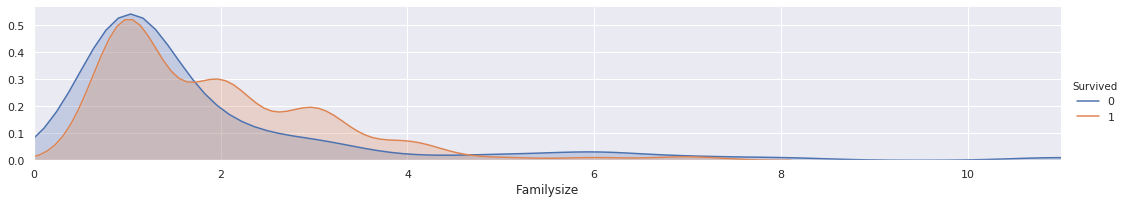

In [674]:
facet = sns.FacetGrid(train, hue="Survived",aspect=5)
facet.map(sns.kdeplot,"Familysize",shade=True)
facet.set(xlim=(0, train["Familysize"].max()))
facet.add_legend()

plt.xlim(0)

In [771]:
family_mapping = {1:0, 2:0.3, 3:0.6, 4:0.9, 5:1.2, 6:1.5, 7:1.8, 8:2.1, 9:2.4, 10:2.7, 11:3.0 }

for dataset in train_test_data:
    dataset["Familysize"] = dataset["Familysize"].map(family_mapping)

In [773]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Familysize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0.0,0,0.3
1,2,1,1,1,1.0,1,0,PC 17599,2.0,0.8,1.0,2,0.3
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0.0,1,0.0
3,4,1,1,1,1.0,1,0,113803,2.0,0.8,0.0,2,0.3
4,5,0,3,0,1.0,0,0,373450,0.0,2.0,0.0,0,0.0


In [774]:
drop_features = ['Ticket','SibSp','Parch']
train = train.drop(drop_features , axis = 1)
test = test.drop(drop_features, axis = 1)
train = train.drop(['PassengerId'], axis = 1)

In [775]:
train_data = train.drop(["Survived"],  axis = 1)
target = train["Survived"]
train_data.head(10)

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Familysize
0,3,0,1.0,0.0,2.0,0.0,0,0.3
1,1,1,1.0,2.0,0.8,1.0,2,0.3
2,3,1,1.0,0.0,2.0,0.0,1,0.0
3,1,1,1.0,2.0,0.8,0.0,2,0.3
4,3,0,1.0,0.0,2.0,0.0,0,0.0
5,3,0,1.0,0.0,2.0,2.0,0,0.0
6,1,0,2.0,2.0,1.6,0.0,0,0.0
7,3,0,0.0,1.0,2.0,0.0,0,1.2
8,3,1,1.0,0.0,2.0,0.0,2,0.6
9,2,1,0.0,1.0,1.8,1.0,2,0.3


In [776]:
train_data.shape ,  target.shape

((891, 8), (891,))

In [777]:
train_data['Age'] = train_data.Age.astype(int)
train_data.head(10)

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Familysize
0,3,0,1,0.0,2.0,0.0,0,0.3
1,1,1,1,2.0,0.8,1.0,2,0.3
2,3,1,1,0.0,2.0,0.0,1,0.0
3,1,1,1,2.0,0.8,0.0,2,0.3
4,3,0,1,0.0,2.0,0.0,0,0.0
5,3,0,1,0.0,2.0,2.0,0,0.0
6,1,0,2,2.0,1.6,0.0,0,0.0
7,3,0,0,1.0,2.0,0.0,0,1.2
8,3,1,1,0.0,2.0,0.0,2,0.6
9,2,1,0,1.0,1.8,1.0,2,0.3


In [778]:
train_data["Embarked"].fillna(train.groupby("Pclass")["Embarked"].transform("median"),inplace=True)
test["Embarked"].fillna(test.groupby("Pclass")["Embarked"].transform("median"),inplace=True)

In [779]:
train_data["Embarked"] = train_data.Embarked.astype(int)

In [780]:
train_data.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Familysize
0,3,0,1,0.0,2.0,0,0,0.3
1,1,1,1,2.0,0.8,1,2,0.3
2,3,1,1,0.0,2.0,0,1,0.0
3,1,1,1,2.0,0.8,0,2,0.3
4,3,0,1,0.0,2.0,0,0,0.0


In [781]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


In [782]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=3)

In [783]:
#KNN
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score =cross_val_score(clf,train_data,target,cv=k_fold,n_jobs=1,scoring = scoring)
print(score)

[0.82222222 0.73033708 0.71910112 0.75280899 0.84269663 0.82022472
 0.78651685 0.7752809  0.84269663 0.80898876]


In [784]:
round(np.mean(score)*100,2)

79.01

In [785]:
#Decision Tree
tree_c = DecisionTreeClassifier()
scoring = "accuracy"
score = cross_val_score(tree_c,train_data,target, cv = k_fold, n_jobs=1, scoring = scoring)
print(score)

[0.8        0.71910112 0.74157303 0.74157303 0.80898876 0.79775281
 0.85393258 0.79775281 0.82022472 0.7752809 ]


In [786]:
round(np.mean(score)*100,2)

78.56

In [787]:
#Random forest
r_for = RandomForestClassifier(n_estimators=13)
scoring = "accuracy"
rand_score = cross_val_score(r_for,train_data,target, cv = k_fold, n_jobs=1, scoring = scoring)
print(rand_score)

[0.76666667 0.73033708 0.7752809  0.75280899 0.82022472 0.80898876
 0.84269663 0.7752809  0.82022472 0.82022472]


In [788]:
round(np.mean(rand_score)*100,2)

79.13

In [789]:
#Gaussian NB
g_nb = GaussianNB()
scoring = "accuracy"
nb_score = cross_val_score(g_nb,train_data,target, cv = k_fold, n_jobs=1, scoring = scoring)
print(nb_score)

[0.8        0.68539326 0.70786517 0.73033708 0.80898876 0.79775281
 0.80898876 0.66292135 0.85393258 0.82022472]


In [790]:
round(np.mean(nb_score)*100,2)

76.76

In [791]:
#support vector machine
sv = SVC()
scoring = "accuracy"
svm_score = cross_val_score(sv,train_data,target, cv = k_fold, n_jobs=1, scoring = scoring)
print(svm_score)

[0.82222222 0.74157303 0.7752809  0.79775281 0.85393258 0.79775281
 0.79775281 0.76404494 0.83146067 0.82022472]


/usr/lib/python3/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/lib/python3/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/lib/python3/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/lib/python3/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 

In [792]:
round(np.mean(svm_score)*100,2)

80.02

In [793]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Familysize
0,892,3,0,1.0,0.0,2.0,2,0,0.0
1,893,3,1,2.0,0.0,2.0,0,2,0.3
2,894,2,0,2.0,0.0,2.0,2,0,0.0
3,895,3,0,1.0,0.0,2.0,0,0,0.0
4,896,3,1,1.0,0.0,2.0,0,2,0.6


In [794]:
clf = SVC()
clf.fit(train_data, target)

test_data = test.drop("PassengerId", axis=1).copy()


/usr/lib/python3/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [795]:

train_data.shape, test_data.shape

((891, 8), (418, 8))

In [796]:
train_data.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Familysize
0,3,0,1,0.0,2.0,0,0,0.3
1,1,1,1,2.0,0.8,1,2,0.3
2,3,1,1,0.0,2.0,0,1,0.0
3,1,1,1,2.0,0.8,0,2,0.3
4,3,0,1,0.0,2.0,0,0,0.0


In [797]:
test_data.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Familysize
0,3,0,1.0,0.0,2.0,2,0,0.0
1,3,1,2.0,0.0,2.0,0,2,0.3
2,2,0,2.0,0.0,2.0,2,0,0.0
3,3,0,1.0,0.0,2.0,0,0,0.0
4,3,1,1.0,0.0,2.0,0,2,0.6


In [798]:
prediction = clf.predict(test_data)

In [799]:
submission = pd.DataFrame({
    "PassengerId" : test["PassengerId"],
    "Survived": prediction
})

submission.to_csv("submission.csv", index=False)

In [800]:
submissions = pd.read_csv("submission.csv") 
submissions.head(10)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0
